In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel("DadRegLis2.xlsx", sheet_name="exer14")
df.head()

,consumo,velocidade
0,22.0,35.0
1,20.0,35.0
2,28.0,40.0
3,31.0,40.0
4,37.0,45.0


In [2]:
df.describe()

,consumo,velocidade
count,12.000000,12.000000
mean,32.000000,47.500000
std,6.809085,8.918826
min,20.000000,35.000000
25%,27.750000,40.000000
50%,32.500000,47.500000
75%,37.250000,55.000000
max,41.000000,60.000000


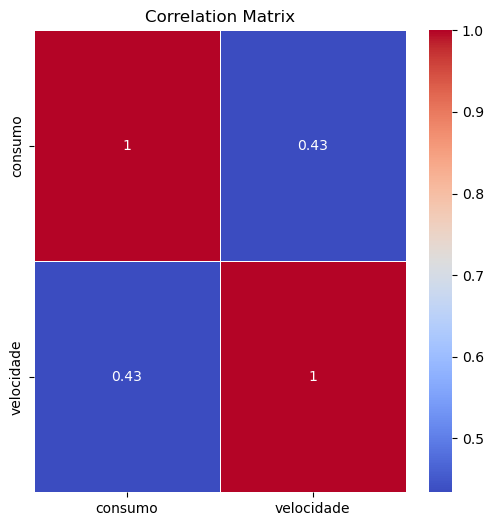

c:\Users\hugog\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


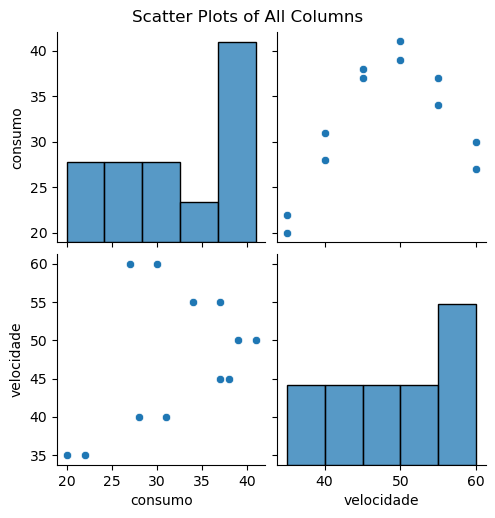

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plotting scatter plots for all pairs of columns
sns.pairplot(df)
plt.suptitle('Scatter Plots of All Columns', y=1.02)
plt.show()

# a)

Given the scatter plot and the correlation results, the optimal model would presumably be $y_i = \beta_0 + \beta_1 x_i+ \beta_2 x_i^2$



## b)

In [26]:
import statsmodels.api as sm

y = df['consumo']  
X = df.drop(columns=['consumo'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     81.03
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.76e-06
Time:                        17:05:10   Log-Likelihood:                -21.855
No. Observations:                  12   AIC:                             49.71
Df Residuals:                       9   BIC:                             51.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -182.5821     17.677    -10.329   

c:\Users\hugog\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


As predicted in a), the proposed model is indeed quite good with an $R^2$ of 0.95 and all coefficients being statistically significant

## c)

Given the t-test results for velocity and velocity squared, we can confidently affirm that there is a statistically significant relationship (both positive linear and negative quadratic) between the amount of gasoline consumed and the average velocity. Besides, no covariate of the model can be excluded when assuming $\alpha = 10\%$ and even $\alpha = 1\%$

## d)

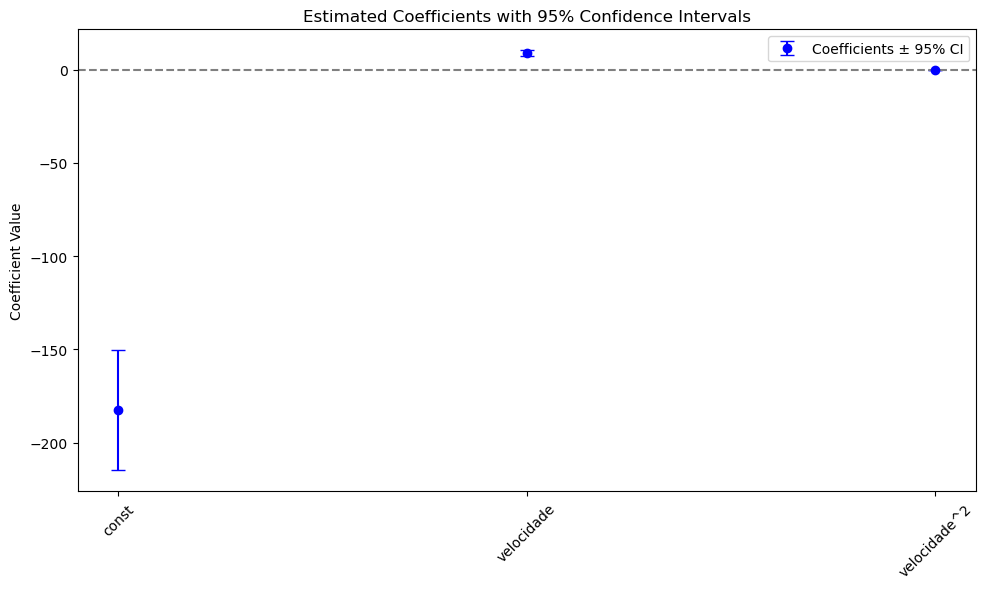

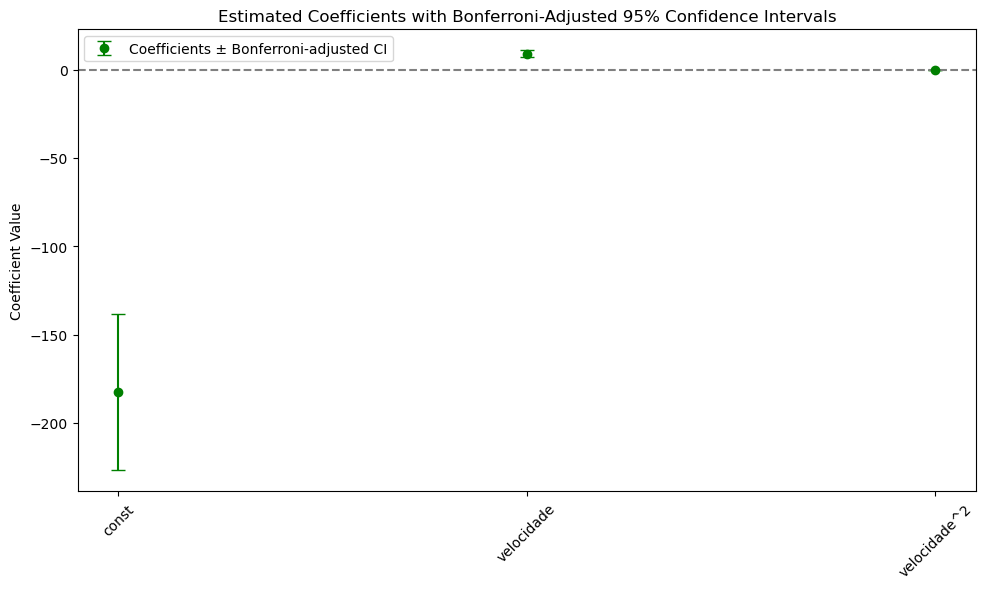

In [27]:
alpha=0.10
# Visualizing the coefficients with confidence intervals
conf_intervals = model.conf_int(alpha=0.10)
coefficients = model.params

plt.figure(figsize=(10, 6))
plt.errorbar(conf_intervals.index, coefficients, 
             yerr=[coefficients - conf_intervals[0], conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='blue', label='Coefficients ± 95% CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()


# Applying Bonferroni adjustment to the confidence intervals
# Calculate the Bonferroni-adjusted alpha level
adjusted_alpha = alpha / len(coefficients)  # Bonferroni adjustment divides alpha by the number of tests

# Calculate the Bonferroni-adjusted confidence intervals
bonferroni_conf_intervals = model.conf_int(alpha=adjusted_alpha)

# Visualizing the coefficients with Bonferroni-adjusted confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(bonferroni_conf_intervals.index, coefficients, 
             yerr=[coefficients - bonferroni_conf_intervals[0], bonferroni_conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='green', label='Coefficients ± Bonferroni-adjusted CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with Bonferroni-Adjusted 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()

In [32]:
from scipy.stats import norm, t
num_coeffs = len(model.params)

# Desired global confidence level
global_confidence_level = 0.9

# Calculate the individual confidence level using Bonferroni correction
alpha = 1 - global_confidence_level
individual_alpha = alpha / num_coeffs
individual_conf_level = 1 - individual_alpha

# Degrees of freedom for the t-distribution
df_residual = model.df_resid

# Calculate the critical t-value for the adjusted confidence level
t_critical = t.ppf(1 - individual_alpha / 2, df=df_residual)

# Extract the coefficients and standard errors
coefficients = model.params[1:len(model.params)+1]  
standard_errors = model.bse[1:len(model.params)+1]  

# Construct the Bonferroni-adjusted confidence intervals
conf_intervals = []
for i in range(len(coefficients)):
    lower_bound = coefficients[i] - t_critical * standard_errors[i]
    upper_bound = coefficients[i] + t_critical * standard_errors[i]
    conf_intervals.append((lower_bound, upper_bound))

# Display the results
for j in range(1, len(model.params)):
    print(f"Bonferroni-adjusted confidence interval for β{j}: ({conf_intervals[j-1][0]:.4f}, {conf_intervals[j-1][1]:.4f})")

Bonferroni-adjusted confidence interval for β1: (7.0720, 10.8944)
Bonferroni-adjusted confidence interval for β2: (-0.1111, -0.0710)


## e)

In [33]:
from scipy.stats import norm, t

x0 = np.array([1, 100,100**2])  

# Predict the mean response at x0
y0_hat = model.predict(x0)

# Degrees of freedom for the residuals
df_residual = model.df_resid

# Estimate the variance of the residuals
s_squared = np.sum(model.resid ** 2) / df_residual
s = np.sqrt(s_squared)  # Standard error of the residuals

# Calculate (X'X)^(-1)
XtX_inv = np.linalg.inv(np.dot(X.T, X))

# Calculate the standard error of the mean prediction
se_mean_prediction = np.sqrt(np.dot(np.dot(x0.T, XtX_inv), x0))

# Calculate the critical t-value for the 95% confidence level
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=df_residual)

# Confidence Interval for E(y0)
ci_lower_mean = y0_hat - t_critical * se_mean_prediction
ci_upper_mean = y0_hat + t_critical * se_mean_prediction

print(f"95% Confidence interval for E(y0): ({ci_lower_mean[0]:.4f}, {ci_upper_mean[0]:.4f})")

# Prediction Interval for a new observation y0
se_prediction = np.sqrt(se_mean_prediction**2 + s_squared)

pi_lower = y0_hat - t_critical * se_prediction
pi_upper = y0_hat + t_critical * se_prediction

print(f"95% Prediction interval for a new observation y0: ({pi_lower[0]:.4f}, {pi_upper[0]:.4f})")

95% Confidence interval for E(y0): (-223.3671, -166.5829)
95% Prediction interval for a new observation y0: (-223.6345, -166.3155)


The intervals are not logic since the estimation is negative and we cannot have a negative consumption of petrol. This is the case since we are giving a $x_i$ that is considerably out-of-the-distribution from the training data and assuming that both positive linear and negative quadratic relationship between the amount of gasoline consumed and the average velocity remain the same for such a $x_i$, which here is clearly incorrect to do

## f)

Correlation matrix of estimated betas:
                 const  velocidade  velocidade^2
const         1.000000   -0.996338      0.987220
velocidade   -0.996338    1.000000     -0.997058
velocidade^2  0.987220   -0.997058      1.000000


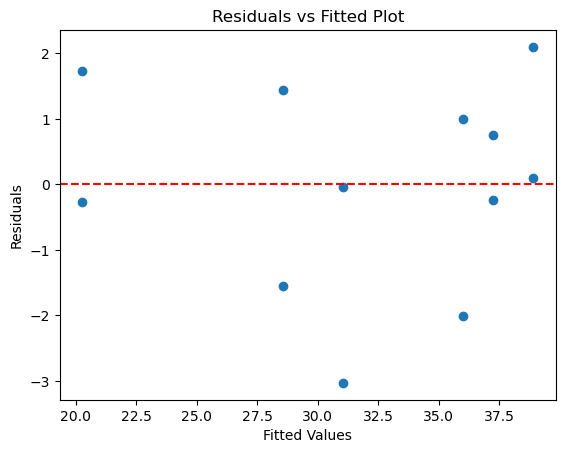

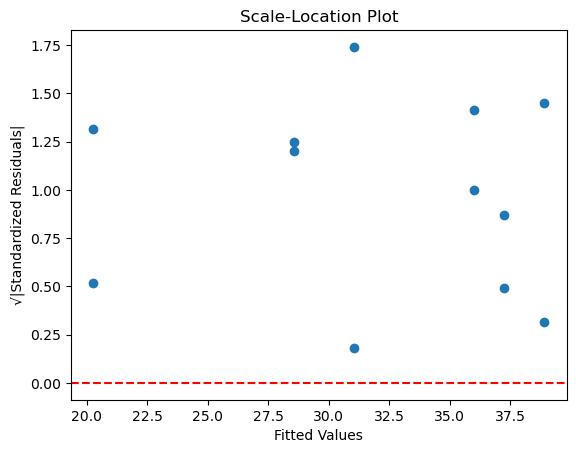

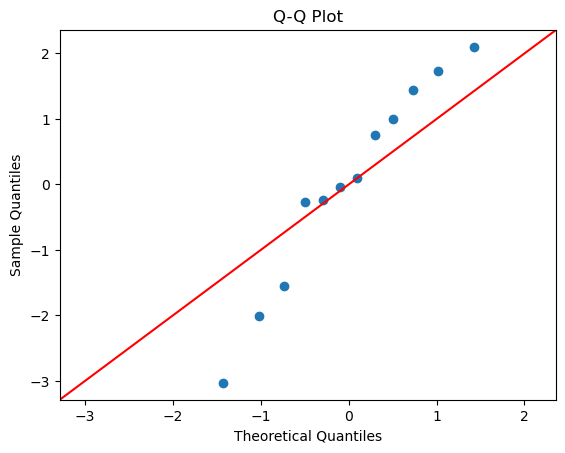

Shapiro-Wilk test statistic: 0.9515, p-value: 0.6591
Fail to reject the null hypothesis: Residuals appear to be normally distributed.
Anderson-Darling test statistic: 0.2654
Critical values and significance levels:
Significance level: 15.0%, Critical value: 0.497
Fail to reject the null hypothesis at the 15.0% significance level.
Significance level: 10.0%, Critical value: 0.566
Fail to reject the null hypothesis at the 10.0% significance level.
Significance level: 5.0%, Critical value: 0.679
Fail to reject the null hypothesis at the 5.0% significance level.
Significance level: 2.5%, Critical value: 0.792
Fail to reject the null hypothesis at the 2.5% significance level.
Significance level: 1.0%, Critical value: 0.942
Fail to reject the null hypothesis at the 1.0% significance level.
Jarque-Bera test statistic: 0.7526, p-value: 0.6864
Fail to reject the null hypothesis: Residuals appear to be normally distributed.


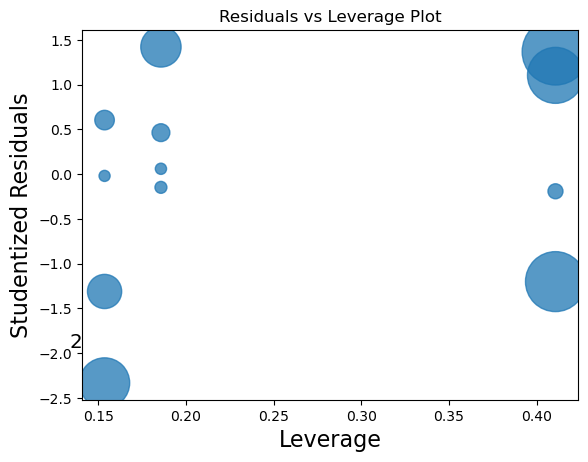

        Feature          VIF
0         const  1257.728571
1    velocidade   170.218750
2  velocidade^2   170.218750


c:\Users\hugog\Desktop\Mestrado - Matérias\Regression Models\Linear_Regression_Diagnostics.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


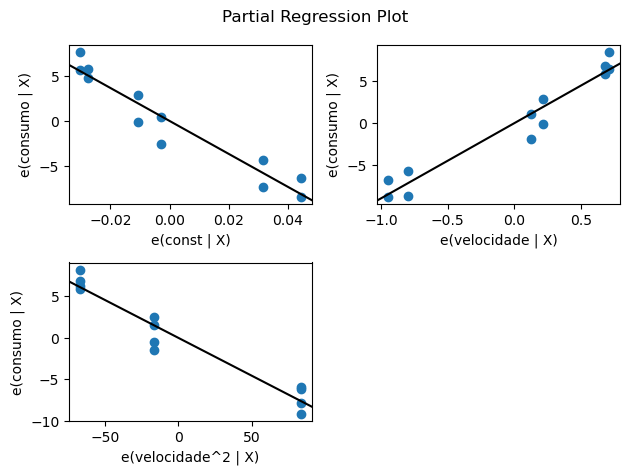

Breusch-Pagan test p-value: 0.9933
Result: Fail to reject the null hypothesis. There is no evidence of heteroscedasticity in the residuals.
White test p-value: 0.7628
Result: Fail to reject the null hypothesis. There is no evidence of heteroscedasticity in the residuals.


In [34]:
from Linear_Regression_Diagnostics import model_diagnostics

model_diagnostics(model, X, y)

We have a considerable issue considering multicollinearity, but the rest seems good